<h1>About Data set</h1>

<div >

    
|Column|Description|
|:------:|:---:|
|<code>InvoiceNumber</code>|	A 6-digit number that is uniquely assigned to each invoice. If this number starts with the letter C, it means that the invoice has been canceled.|
|<code>ProductCode</code>|A 5-digit number that is uniquely assigned to each product type.|
|<code>ProductName</code>|Product name|
|<code>Quantity</code>|Number of orders of a product type on the invoice|
|<code>InvoiceDate</code>|Invoice creation date|
|<code>UnitPrice</code>|The price of a type of product per unit.|
|<code>CusotmerId</code>|A 5-digit number that is uniquely assigned to each customer.|
|<code>Country</code>|Name of the customer's country of residence|

</div>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)

In [2]:
df = pd.read_excel('./data/sales.xlsx')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h1 align=center>Preprocessing</h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  525461 non-null  object        
 1   ProductCode    525461 non-null  object        
 2   ProductName    522533 non-null  object        
 3   Quantity       525461 non-null  int64         
 4   InvoiceDate    525461 non-null  datetime64[ns]
 5   UnitPrice      525461 non-null  float64       
 6   CustomerId     417534 non-null  float64       
 7   Country        525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


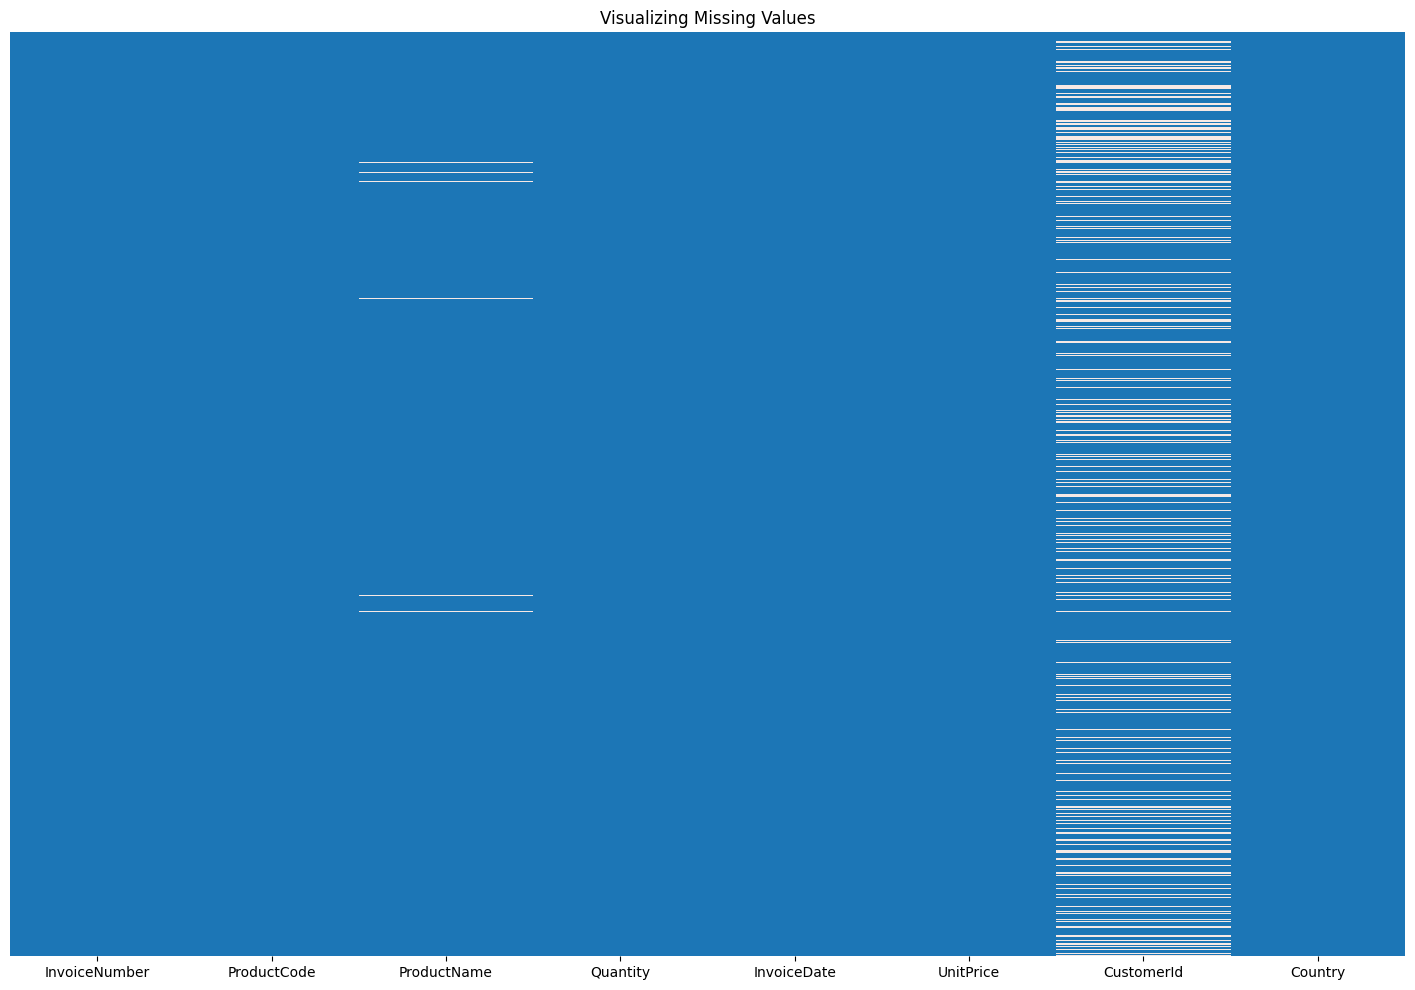

In [4]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(colors), yticklabels=False);

In [5]:
def preprocess(data):
    processed_data = data.copy()
    # drop CustomerId mising
    processed_data = data[data['CustomerId'].notna()]

    # drop duplicates
    processed_data = processed_data.drop_duplicates()

    # drop negative UnitPrice
    processed_data = processed_data[processed_data['UnitPrice'] > 0]

    # percentage of cancelled orders
    percentage_cancelled_orders = round((processed_data[processed_data['InvoiceNumber'].str.lower().str.contains('c', na=False)].InvoiceNumber.nunique() * 100)/len(processed_data['InvoiceNumber'].unique()))
    print(f"percentage of cancelled orders : {percentage_cancelled_orders}")

    # top 5 cancelling customers
    processed_data['CustomerId'] = processed_data['CustomerId'].astype('int').astype('str')
    top_cancelling_customers = processed_data[processed_data['InvoiceNumber'].str.lower().str.contains('c', na=False)].groupby('CustomerId')['InvoiceNumber'].nunique().sort_values(ascending=False).head(5).index.to_list()
    print(f"top 5 cancelling customers : {top_cancelling_customers}")

    # drop ccancelled orders
    processed_data = processed_data[~(processed_data['InvoiceNumber'].str.lower().str.contains('c', na=False))]

    processed_data.to_csv("./data/preprocessed_sales.csv", index=False)

    return processed_data

In [6]:
data = preprocess(df)
data.info()

percentage of cancelled orders : 19
top 5 cancelling customers : ['14911', '14527', '15311', '14156', '17841']
<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  400916 non-null  object        
 1   ProductCode    400916 non-null  object        
 2   ProductName    400916 non-null  object        
 3   Quantity       400916 non-null  int64         
 4   InvoiceDate    400916 non-null  datetime64[ns]
 5   UnitPrice      400916 non-null  float64       
 6   CustomerId     400916 non-null  object        
 7   Country        400916 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.5+ MB


<h1>A little Analysis</h1>

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [8]:
for column in categorical_columns:
    num_unique = data[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'InvoiceNumber' has 19213 unique categories.
'ProductCode' has 4017 unique categories.
'ProductName' has 4444 unique categories.
'CustomerId' has 4312 unique categories.
'Country' has 37 unique categories.


In [9]:
for column in ['Country']:
    print(f"\nTop value counts in '{column}':\n{data[column].value_counts().head(10)}")


Top value counts in 'Country':
Country
United Kingdom    364233
EIRE                8503
Germany             7645
France              5452
Netherlands         2728
Spain               1228
Switzerland         1170
Belgium             1036
Portugal             983
Sweden               867
Name: count, dtype: int64


In [10]:
# Number of remaining invoices
data.InvoiceNumber.nunique()

19213

In [11]:
# Data collection period
(data['InvoiceDate'].min(), data['InvoiceDate'].max())

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [12]:
data.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


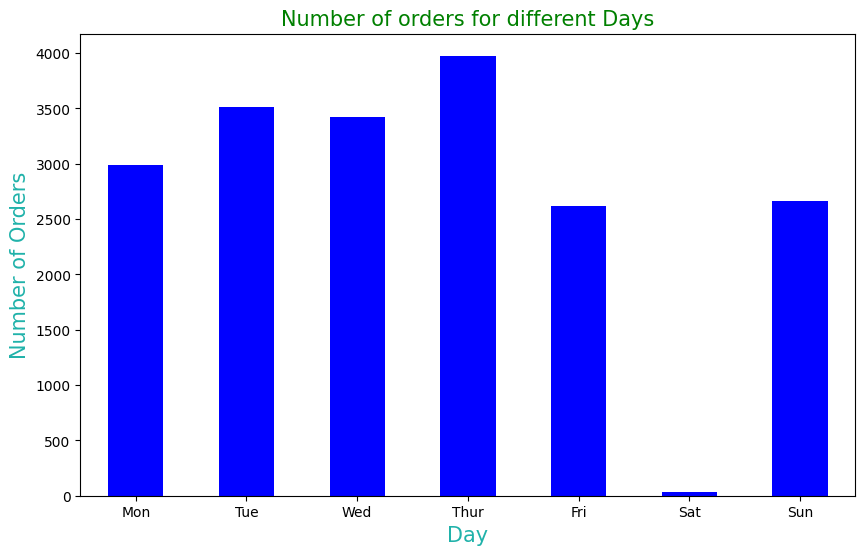

In [13]:
# Number of orders for different Days

fig1, ax1 = plt.subplots(figsize=(10, 6))

data['day_of_week'] = pd.to_datetime(data["InvoiceDate"]).dt.day_of_week

data.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index().plot(ax=ax1, kind="bar", color="blue")

days = ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
ax1.set_xticklabels(days, rotation=0, size=10)
ax1.set_xlabel('Day', color='lightseagreen', size=15)
ax1.set_ylabel('Number of Orders', color='lightseagreen', size=15)
ax1.set_title('Number of orders for different Days', color='green', size=15)
plt.show()

Text(0.5, 1.0, 'Number of orders for different Months')

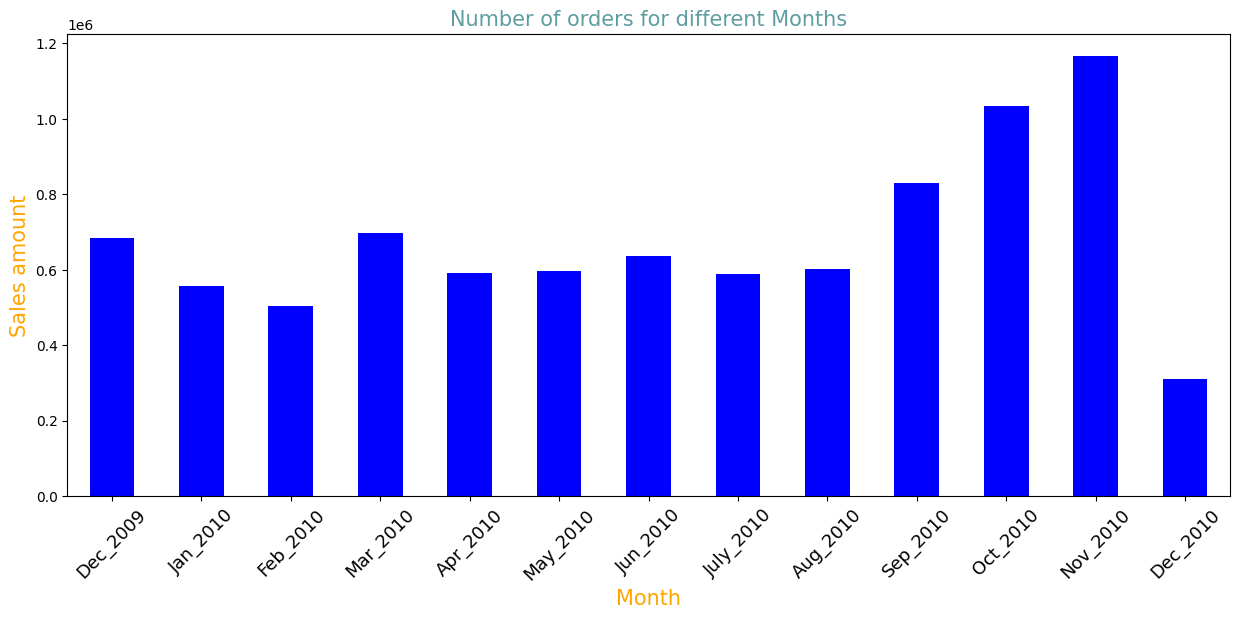

In [14]:
# Number of orders for different Months

fig2, ax2 = plt.subplots(figsize=(15, 6))

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data['month_year'] = pd.to_datetime(data["InvoiceDate"].sort_values()).dt.strftime("%b_%Y")

data.groupby('month_year', sort=False)['TotalPrice'].sum().plot(ax=ax2, kind="bar", color="blue")

labels = ax2.get_xticklabels()
labels[7] = "July_2010"
ax2.set_xticklabels(labels, rotation=45, size=13)
ax2.set_xlabel("Month", size=15, color="orange")
ax2.set_ylabel("Sales amount", size=15, color="orange")
ax2.set_title("Number of orders for different Months", color="cadetblue", size=15)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNumber  400916 non-null  object        
 1   ProductCode    400916 non-null  object        
 2   ProductName    400916 non-null  object        
 3   Quantity       400916 non-null  int64         
 4   InvoiceDate    400916 non-null  datetime64[ns]
 5   UnitPrice      400916 non-null  float64       
 6   CustomerId     400916 non-null  object        
 7   Country        400916 non-null  object        
 8   day_of_week    400916 non-null  int32         
 9   TotalPrice     400916 non-null  float64       
 10  month_year     400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 35.2+ MB


<h2>Drawing a scatter diagram of sales and number of customers by country</h2>

<p>In this step, we will show different countries on a scatter chart based on their sales volume and number of customers. In addition, we will divide the countries into 4 groups based on sales volume and number of customers and determine the color of the dots related to the countries based on their group.</p>

<p>If we denote the sales volume by <code>SA</code> and its third quartile by <code>qSA</code>, the number of customers by <code>CC</code> and its third quartile by <code>qCC</code>, the 4 groups of countries are defined as follows.</p>

| <b>Group number</b> | <b>Group Title</b> | <b>Condition</b> | <b>Color</b> |
| :---: | :---: | :---: | :---: |
| 1 | Highest customer & revenue | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC > qCC</code> | <code>red</code> |
| 2 | High customer & low revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC > qCC</code> | <code>blue</code> |
| 3 | High revenue & low customer | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC < qCC</code> | <code>green</code> |
| 4 | Low customer & revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC < qCC</code> | <code>cyan</code> |


In [16]:
# Computing the total sales amount per country
sales_amount_df = data.groupby("Country")["TotalPrice"].sum().reset_index(name='Sales amount')

# Computing the number of customers per country
number_of_customers_df = data.groupby("Country")["CustomerId"].nunique().reset_index(name='Number of customers')

In [17]:
market_study = sales_amount_df.merge(number_of_customers_df, on="Country")
# We drop orders from the United Kingdom because the order volume for this country differs greatly from the rest.
market_study = market_study[market_study.Country != "United Kingdom"]
market_study.head()

,Country,Sales amount,Number of customers
0,Australia,31446.80,15
1,Austria,13414.33,10
2,Bahrain,805.97,2
3,Belgium,24537.58,17
4,Brazil,268.27,1


In [18]:
def calc_group(row, x_threshold, y_threshold):
    """Calculate the group of each country based on the given thresholds for metrics"""
    x = row[X]
    y = row[Y]
    if x >= x_threshold and y >= y_threshold:
        return 1
    elif x < x_threshold and y > y_threshold:
        return 2
    elif x > x_threshold and y < y_threshold:
        return 3
    else:
        return 4

X = "Sales amount"
Y = "Number of customers"

x_threshold = market_study[X].quantile(q = 0.75)
y_threshold = market_study[Y].quantile(q = 0.75)

market_study["label"] = market_study.apply(
    lambda row: calc_group(row, x_threshold, y_threshold), axis=1
)

market_study.head()

,Country,Sales amount,Number of customers,label
0,Australia,31446.80,15,1
1,Austria,13414.33,10,4
2,Bahrain,805.97,2,4
3,Belgium,24537.58,17,2
4,Brazil,268.27,1,4


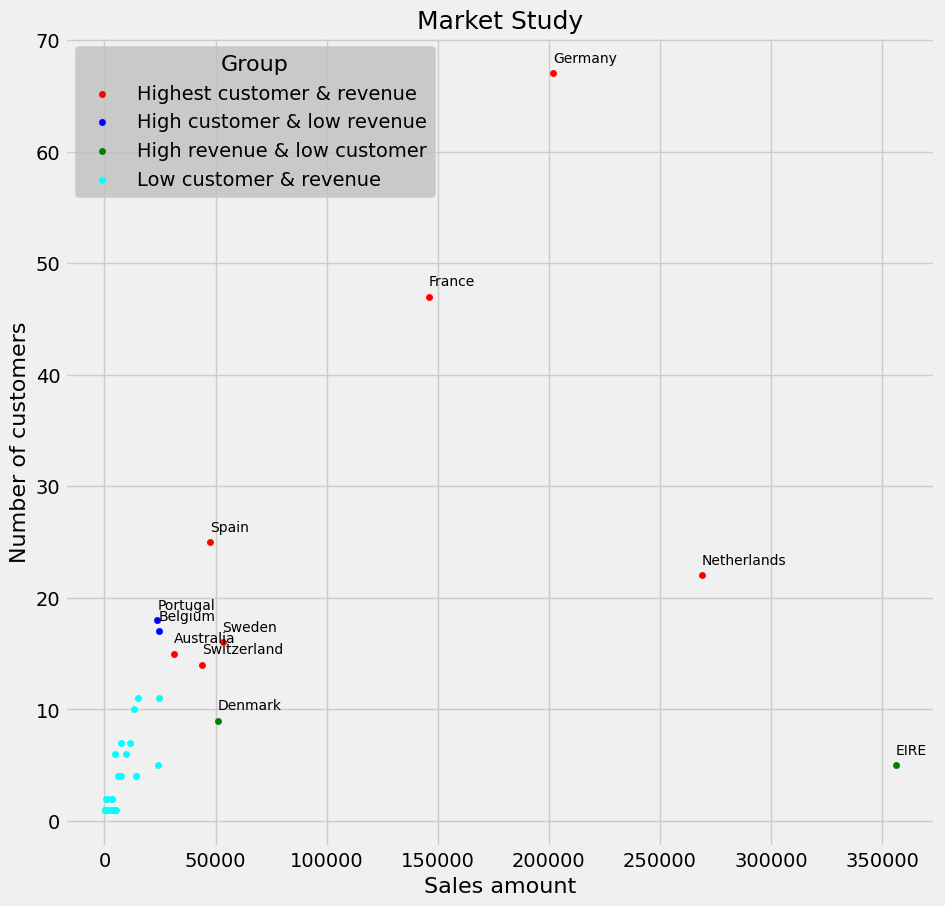

In [19]:
plt.style.use('fivethirtyeight')

fig , ax = plt.subplots(figsize=(10,10))

ax.scatter(market_study[market_study.label==1]['Sales amount'],
           market_study[market_study.label==1]['Number of customers'],
           color='red', s=20, label='Highest customer & revenue')

ax.scatter(market_study[market_study.label==2]['Sales amount'],
           market_study[market_study.label==2]['Number of customers'],
           color='blue', s=20, label='High customer & low revenue')

ax.scatter(market_study[market_study.label==3]['Sales amount'],
           market_study[market_study.label==3]['Number of customers'],
           color='green', s=20, label='High revenue & low customer')
           
ax.scatter(market_study[market_study.label==4]['Sales amount'],
           market_study[market_study.label==4]['Number of customers'],
           color='cyan', s=20, label='Low customer & revenue')

ax.set_xlabel("Sales amount", fontsize = 16)
ax.set_ylabel("Number of customers", fontsize = 16)
ax.set_title("Market Study",fontsize = 18)

ax.legend(fontsize=14, title='Group', title_fontsize=16, frameon=True, facecolor='silver')

for Country in market_study.Country.values.tolist():
    val = market_study[market_study['Country'] == Country]['label'].values[0]
    if val==1 or val==3 or val==2:
        ax.text(int(market_study[market_study.Country==Country]['Sales amount'].iloc[0]),
            market_study[market_study.Country==Country]['Number of customers'].iloc[0] + 1, Country, fontsize=10)
        
plt.show()

<h1>Customer Valuation</h1>

<p>In this section, we will group customers
To do this, you will use a well-known method in the field of customer behavior analysis called <a href="https://en.wikipedia.org/wiki/RFM_(market_research)"><i>RFM</i></a>.
In this method, three criteria are calculated for each customer:</p>
<ol>
<li>
<b>Recency:</b> The number of days since the customer made their last purchase.
</li>
<li>
<b>Frequency:</b> The number of times a customer has made a purchase from us.
</li>
<li>
<b>Monetary Value:</b> The total revenue the company has earned from a customer.
</li>
</ol>

<h2>Recency</h2>

In [20]:
last_day = data['InvoiceDate'].sort_values().iloc[-1] + datetime.timedelta(days=1)
last_day

Timestamp('2010-12-10 20:01:00')

In [21]:
recency = data.groupby('CustomerId')['InvoiceDate'].max().apply(lambda x: (last_day - x).days)
df_customer_segments = pd.DataFrame({'CustomerId': recency.index, 'Recency': recency.values})
df_customer_segments.head()

,CustomerId,Recency
0,12346,165
1,12347,3
2,12348,74
3,12349,43
4,12351,11


<h2>Frequency</h2>

In [22]:
df_customer_segments['Frequency'] = data.groupby(['CustomerId'])['InvoiceNumber'].nunique().values
df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346,165,11
1,12347,3,2
2,12348,74,1
3,12349,43,3
4,12351,11,1


<h2>Monetary Value</h2>

In [23]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]
df_customer_segments['MonetaryValue'] = data.groupby('CustomerId')['TotalPrice'].sum().values
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue
0,12346,165,11,372.86
1,12347,3,2,1323.32
2,12348,74,1,222.16
3,12349,43,3,2671.14
4,12351,11,1,300.93


<p>Now we need to divide each of these three criteria into 4 different groups based on the first, second, and third quartiles as shown below :</p>
<center>
<div>

| <b>Group number</b> | <b>Condition</b> |
| :---: | :---: | 
| 1 | <code dir=ltr>value <= Q1</code> | 
| 2 | <code dir=ltr>Q1 < value <= Q2</code> | 
| 3 | <code dir=ltr>Q2 < value <= Q3</code> | 
| 4 | <code dir=ltr>Q3 < value</code> | 

</div>
</center>

In [24]:
def get_quartile(arr):
    qu = np.quantile(arr, [0.25, 0.5, 0.75])
    output = []
    for value in arr:
        if value <= qu[0]:
            output.append(1)
        elif value > qu[0] and value <= qu[1]:
            output.append(2)
        elif value > qu[1] and value <= qu[2]:
            output.append(3)
        elif value > qu[2]:
            output.append(4)
    return output

In [25]:
df_customer_segments['R_quartile'] = get_quartile(df_customer_segments['Recency'])
df_customer_segments['F_quartile'] = get_quartile(df_customer_segments['Frequency'])
df_customer_segments['M_quartile'] = get_quartile(df_customer_segments['MonetaryValue'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile
0,12346,165,11,372.86,4,4,2
1,12347,3,2,1323.32,1,2,3
2,12348,74,1,222.16,3,1,1
3,12349,43,3,2671.14,2,3,4
4,12351,11,1,300.93,1,1,1


<h1>RFM</h1>

In [26]:
df_customer_segments['RFM'] = (df_customer_segments['R_quartile'].astype(str) +
                               df_customer_segments['F_quartile'].astype(str) +
                               df_customer_segments['M_quartile'].astype(str)).astype(int)
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM
0,12346,165,11,372.86,4,4,2,442
1,12347,3,2,1323.32,1,2,3,123
2,12348,74,1,222.16,3,1,1,311
3,12349,43,3,2671.14,2,3,4,234
4,12351,11,1,300.93,1,1,1,111


<p>Now we group the customers based on the values ​​of the <code>RFM</code> column and according to the table below.</p>

<p>
Note that in this table, <code>X</code> means any value. For example <code>14X</code> means <code>141</code>, <code>142</code>, <code>143</code> and <code>144</code>
</p>

<center>
<div>

| <b>Segment</b> | <b>RFM</b> |
| :---: | :---: | 
| Best | <code dir=ltr>144</code> | 
| AlmostLost | <code dir=ltr>344</code> | 
| LostBigSpenders | <code dir=ltr>444</code> | 
| LostCheap | <code dir=ltr>441</code> | 
| Loyal | <code dir=ltr>X4X</code> | 
| BigSpenders | <code dir=ltr>XX4</code> | 

</div>
</center>

In [27]:
def group_rfm(input):
    output = []
    for i in input:
        if i == 144:
            output.append('Best')
        elif i == 344:
            output.append('AlmostLost')
        elif i == 444:
            output.append('LostBigSpenders')
        elif i == 441:
            output.append('LostCheap')
        elif str(i)[1] == '4':
            output.append('Loyal')
        elif str(i)[2] == '4':
            output.append('BigSpenders')
        else:
            output.append('Normal')
    return output

In [28]:
df_customer_segments['Segment'] = group_rfm(df_customer_segments['RFM'])
df_customer_segments.sort_values(['Recency', 'Frequency'], ascending=[True, False]).head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
1840,14911,1,205,152121.22,1,4,4,144,Best
251,12748,1,144,22457.90,1,4,4,144,Best
2133,15311,1,121,55942.74,1,4,4,144,Best
3989,17841,1,91,29562.02,1,4,4,144,Best
4183,18102,1,89,349164.35,1,4,4,144,Best


In [29]:
df_customer_segments['Segment'].value_counts()

Segment
Normal             3049
Best                440
Loyal               387
BigSpenders         321
AlmostLost           98
LostBigSpenders      16
LostCheap             1
Name: count, dtype: int64

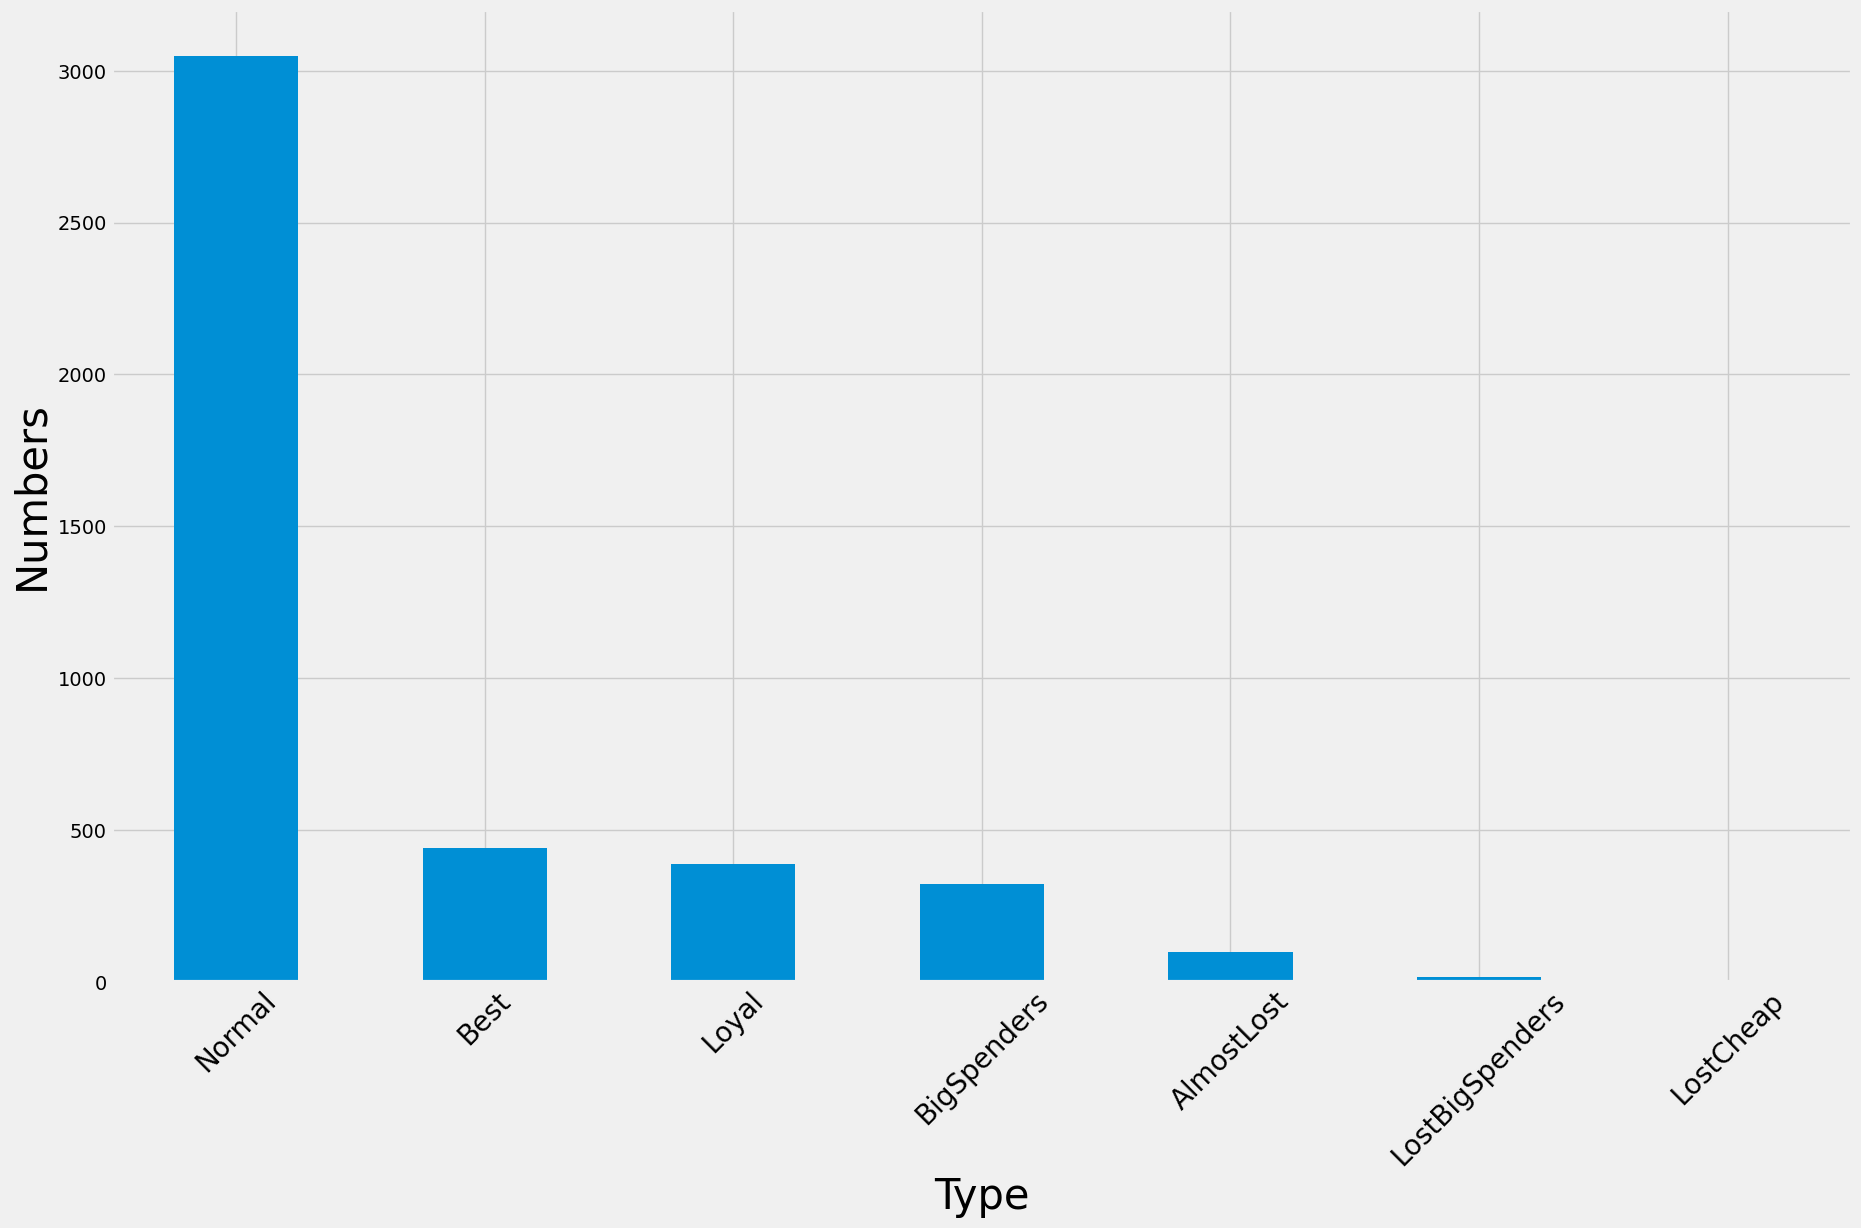

In [30]:
fig, ax = plt.subplots(figsize=(20, 12))
df_customer_segments['Segment'].value_counts().plot(ax=ax, kind='bar')
labels = df_customer_segments['Segment'].value_counts().index
ax.set_xticklabels(labels, rotation=45, size=20)
ax.set_xlabel("Type", size=30)
ax.set_ylabel("Numbers", size=30)
plt.show()

<h1>HEATMAP</h1>
<p>In this section, we draw a heatmap that represents the company's customer retention.</p>

In [31]:
# Create a new column "InvoiceMonth" with a datetime object representing the first day of the month of each transaction
data['InvoiceMonth'] = data['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))

# Create a new column "CohortMonth" with a datetime object representing the first month that a customer made a purchase
data['CohortMonth'] = data.groupby('CustomerId')['InvoiceMonth'].transform('min')

data.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,day_of_week,TotalPrice,month_year,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,1,83.4,Dec_2009,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,81.0,Dec_2009,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,81.0,Dec_2009,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,1,100.8,Dec_2009,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,1,30.0,Dec_2009,2009-12-01,2009-12-01


In [32]:
# Define a function to extract the year and month from a datetime column in a Pandas DataFrame
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Extract the year and month from the "InvoiceMonth" and "CohortMonth" columns using the get_date_int function
invoice_year, invoice_month = get_date_int(data, 'InvoiceMonth')
cohort_year, cohort_month  = get_date_int(data, 'CohortMonth')

# Calculate the difference in years and months between the "InvoiceMonth" and "CohortMonth" columns
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the "CohortIndex" column by converting the difference in years and months to months, and adding one
data['CohortIndex'] = years_diff * 12 + months_diff + 1

# Select only the "CohortMonth" and "CohortIndex" columns of the DataFrame
data[['CohortMonth', 'CohortIndex']]

,CohortMonth,CohortIndex
0,2009-12-01,1
1,2009-12-01,1
2,2009-12-01,1
3,2009-12-01,1
4,2009-12-01,1
...,...,...
525456,2009-12-01,13
525457,2009-12-01,13
525458,2009-12-01,13
525459,2009-12-01,13


In [33]:
# Group the DataFrame by "CohortMonth" and "CohortIndex"
grouping = data.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customer IDs in each (cohort month, cohort index) group
cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)

# Reset the index of the DataFrame to create a flat table with columns for cohort month, cohort index, and customer count
cohort_data = cohort_data.reset_index()

# Reshape the DataFrame so that the columns represent the "CohortIndex" values,
# the rows represent the "CohortMonth" values, and the cell values represent the count of unique customer IDs
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerId')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Select the first column of the "cohort_counts" DataFrame, which represents the count of customers in each cohort group
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the entire "cohort_counts" DataFrame by the "cohort_sizes" series, row-wise, to create a matrix of customer retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Multiply the entire "retention" DataFrame by 100 and round to two decimal places to create human-readable percentages
retention = retention.round(2) * 100

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,42.0,50.0,25.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,30.0,10.0,NaN
2010-02-01,100.0,24.0,22.0,29.0,25.0,20.0,19.0,29.0,25.0,28.0,7.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,20.0,25.0,30.0,28.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,7.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,8.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.0,19.0,20.0,23.0,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,30.0,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
retention.index = retention.index.date

In [37]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,42.0,50.0,25.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,30.0,10.0,NaN
2010-02-01,100.0,24.0,22.0,29.0,25.0,20.0,19.0,29.0,25.0,28.0,7.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,20.0,25.0,30.0,28.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,7.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,8.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.0,19.0,20.0,23.0,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,30.0,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,100.0,23.0,23.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


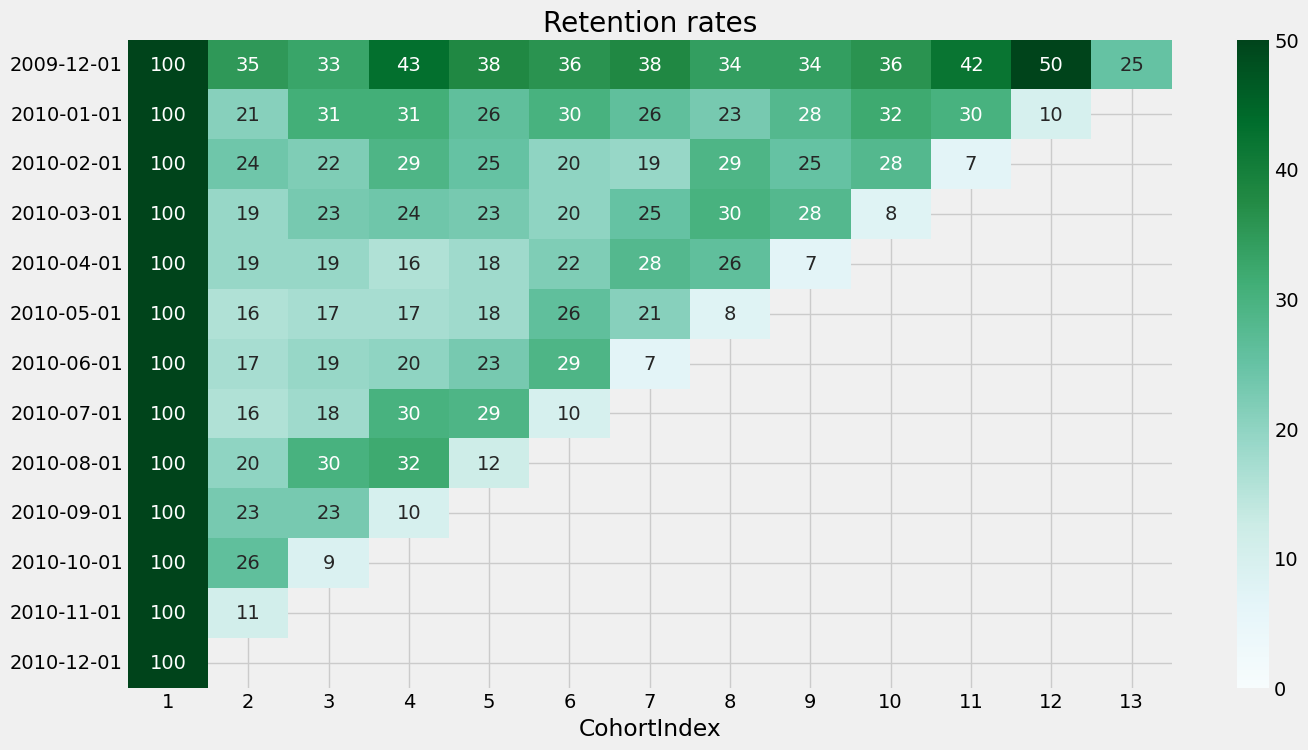

In [36]:
# Convert the index of the "retention" DataFrame to a date-based index for better labeling on the heatmap

fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap 
ax = sns.heatmap(data = retention, annot = True,
                 fmt=".0f",
                 vmin = 0,
                 vmax = 50,
                 cmap = 'BuGn',
                    )
ax.set_title("Retention rates")
plt.show()